In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [56]:
# ECM:
ecm_data = pd.read_csv('../config/initial_cond/cylinder_unit_ecm_2D_doble.tsv', sep='\t', header=0)
# Filter data where z=5
ecm_data_filtered = ecm_data[ecm_data['z'] == 0]

# cells:
# Read the data file (assuming it's comma or space separated)
cells_data = pd.read_csv('../config/initial_cond/cylinder_unit_cells_330_2D.csv', sep=',', header=None, names=['x', 'y', 'z', 'type'])
cells_data[['x']] = (((cells_data[['x']] - 10) / 20) + 35).astype(int)
cells_data[['y']] = (((cells_data[['y']] - 10) / 20) + 36).astype(int)
cells_data[['z']] = (((cells_data[['z']] - 10) / 20) + 0).astype(int)
# Filter data where z=2 which is 5 in the other datasets
cells_data_filtered = cells_data[cells_data['z'] == 0]

# endothelium:
endo_data = pd.read_csv('../config/initial_cond/cylinder_unit_endo_2D.tsv', sep='\t', header=0)
endo_data[['x']] = (endo_data[['x']] - 1).astype(int)
endo_data_filtered = endo_data[endo_data['z'] == 0]

In [57]:
print(sorted(ecm_data['z'].unique())) 
print(sorted(cells_data['z'].unique()))
print(sorted(endo_data['z'].unique()))


[0]
[0]
[0]


In [58]:
# print(sorted(ecm_data['x'].unique())) 
# print(sorted(endo_data['x'].unique()))
print(sorted(cells_data['x'].unique()))
# print(sorted(ecm_data['y'].unique())) 
# print(sorted(endo_data['y'].unique()))
print(sorted(cells_data['y'].unique()))
print(sorted(cells_data['z'].unique()))

# print(cells_data['x'].describe())
# print(cells_data['x'].value_counts().sort_index())


[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
[19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]
[0]


In [59]:
# Create a pivot table for the heatmap
# First find the dimensions of the grid
x_max = int(ecm_data_filtered['x'].max())
y_max = int(ecm_data_filtered['y'].max())

# Create an empty grid
grid = np.zeros((y_max + 1, x_max + 1))

# Fill the grid with 1s of ECM
for _, row in ecm_data_filtered.iterrows():
    grid[int(row['y']), int(row['x'])] = 1
    
# Fill the grid with 2s of endothelium
for _, row in endo_data_filtered.iterrows():
    grid[int(row['y']), int(row['x'])] = 2

# for _, row in cells_data_filtered.iterrows():
#     grid[int(row['y']), int(row['x'])] = 3
    
# Fill cells with different values based on their type
for _, row in cells_data_filtered.iterrows():
    # Assuming types start from 1, add an offset to distinguish from ECM and endothelium
    grid[int(row['y']), int(row['x'])] = row['type'] + 3 


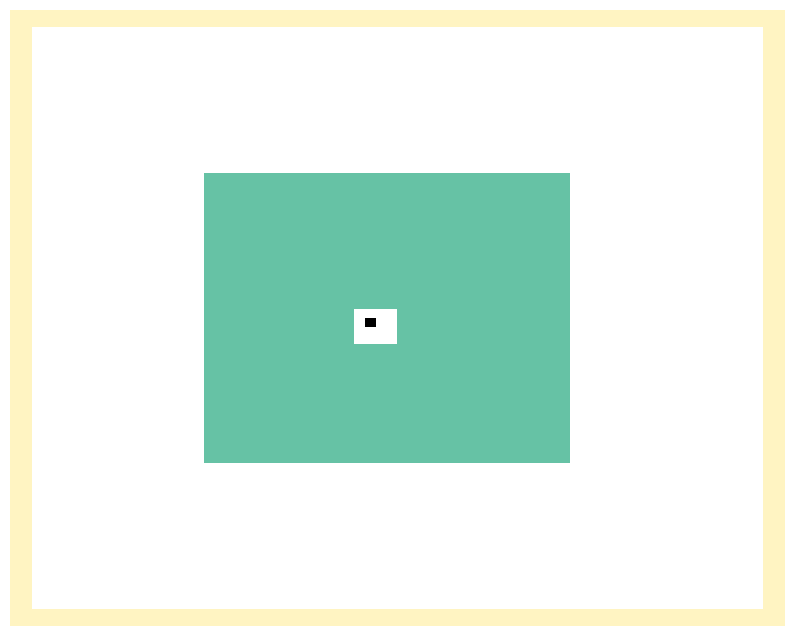

In [60]:
# Create custom colormap for different cell types
n_types = len(cells_data_filtered['type'].unique())
colors = ['white', '#FFF4C2', 'black'] + sns.color_palette("Set2", n_types).as_hex()
custom_cmap = plt.cm.colors.ListedColormap(colors)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(grid, 
            cmap=custom_cmap,  
            cbar=False,     
            xticklabels=False, 
            yticklabels=False)

plt.gca().invert_yaxis()
plt.show()

In [61]:
cells_data_filtered2 = cells_data_filtered.copy()
cells_data_filtered2[['x']] = (((cells_data_filtered2[['x']] -36) * 20) + 10).astype(int)
cells_data_filtered2[['y']] = (((cells_data_filtered2[['y']] -36) * 20) + 10).astype(int)
cells_data_filtered2[['z']] = (((cells_data_filtered2[['z']] -3) * 20) + 30).astype(int)
# cells_data_filtered[['y']] = (((cells_data_filtered[['y']] - 10) / 20) + 36).astype(int)
# cells_data_filtered[['z']] = (((cells_data_filtered[['z']] - 10) / 20) + 3).astype(int)


print(sorted(cells_data_filtered2['x'].unique()))
print(sorted(cells_data_filtered2['y'].unique()))
print(sorted(cells_data_filtered2['z'].unique()))


[-350, -330, -310, -290, -270, -250, -230, -210, -190, -170, -150, -130, -110, -90, -70, -50, -30, -10, 10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290, 310]
[-330, -310, -290, -270, -250, -230, -210, -190, -170, -150, -130, -110, -90, -70, -50, -30, -10, 10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290, 310, 330]
[-30]


In [62]:
ecm_data_filtered.to_csv('../config/cylinder_unit_ecm_2D.tsv', sep='\t', index=False)
cells_data_filtered2.to_csv('../config/cylinder_unit_cells_2D.csv', sep=',', index=False)
endo_data_filtered.to_csv('../config/cylinder_unit_endo_2D.tsv', sep='\t', index=False)
